## 3. Analyze Data

[![Python Data Science](https://apmonitor.com/che263/uploads/Begin_Python/DataScience03.png)](https://www.youtube.com/watch?v=EO_YpBs8cs0 "Python Data Science")

Once data is read into Python, a typical first step is to summarize the data with statistical analysis. This is especially true if the data is inconvenient or too large to view in a spreadsheet like Microsoft Excel (limited to 1,048,576 rows and 16,384 columns). Summary statistics include the count, mean, standard deviation, maximum, minimum, and quartile information for the data columns. 

#### Generate Data

Run the next cell to:

- Generate `n` linearly spaced values betweeen `0` and `n-1` with `np.linspace(start,end,count)`
- Draw random samples from a uniform distribution between 0 and 1 with `np.random.rand(count)`
- Draw random samples from a normal (Gaussian) distribution with `np.random.normal(mean,std,count)`
- Combine `time`, `x`, and `y` with a vertical stack `np.vstack` and transpose `.T` for column oriented data.
- Save CSV text file `03-data.csv` with header `time,x,y`.

In [2]:
import numpy as np
n = 1000
time = np.linspace(0,n-1,n)
x = np.random.rand(n)
y = np.random.normal(1,1,n)
data = np.vstack((time,x,y)).T
np.savetxt('03-data.csv',data,header='time,x,y',delimiter=',',comments='')

#### Display Data Distributions

The next lesson shows how to visualize data. The histogram is a preview of how to create graphics so that data can be evaluated visually.

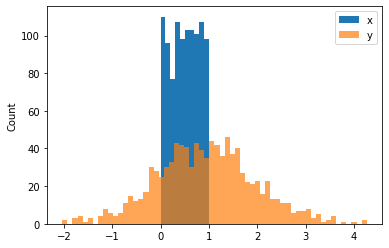

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(x,10,label='x')
plt.hist(y,60,label='y',alpha=0.7)
plt.ylabel('Count'); plt.legend()
plt.show()

#### Use `numpy` to analyze data

The `np.loadtxt` function reads the CSV data file `03-data.csv`. The numpy functions `size` (dimensions), `mean` (average), `std` (standard deviation), and `median` are summary statistics. If you don't specify the `axis` then `numpy` gives a statistic across both the rows (`axis=0`) and columns (`axis=1`).

In [4]:
import numpy as np
data = np.loadtxt('03-data.csv',delimiter=',',skiprows=1)

print('Dimension (rows,columns):')
print(np.size(data,0),np.size(data,1))

print('Average:')
print(np.mean(data,axis=0))

print('Standard Deviation:')
print(np.std(data,0))

print('Median:')
print(np.median(data,0))

Dimension (rows,columns):
1000 3
Average:
[499.5          0.50565489   0.93746893]
Standard Deviation:
[288.67499026   0.29087651   1.01665576]
Median:
[499.5          0.51137895   0.94512749]


#### Use `pandas` to analyze data

Pandas simplifies the data analysis with the `.describe()` function that is a method of `DataFrame` that is created with `pd.read_csv()`. Note that the data file can either be a local file name or a web-address such as 

```python
url='https://apmonitor.com/pdc/uploads/Main/tclab_data2.txt'
data = pd.read_csv(url)
data.describe()
```

In [ ]:
import pandas as pd
data = pd.read_csv('03-tclab.csv')
data.describe()

### Activity

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

#### Generate Data Set 1 

![connections](https://apmonitor.com/che263/uploads/Begin_Python/connections.png)

Generate a file from the TCLab data with seconds (`t`), heater levels (`Q1` and `Q2`), and temperatures (`lab.T1` and `lab.T2`). Record data every second for 120 seconds and change the heater levels every 30 seconds to a random number between 0 and 80 with `np.random.randint()`. There is no need to change this program, only run it for 2 minutes to collect the data.

#### Retrieve Data Set 1

If you do not have a TCLab device, read a data file 1 from [an online link](https://apmonitor.com/do/uploads/Main/tclab_dyn_data2.txt) with:

```python
# data file 
url = 'http://apmonitor.com/do/uploads/Main/tclab_dyn_data2.txt'
data1=pd.read_csv(url)
```

In [ ]:
import tclab, time, csv
import numpy as np
n = 120 
with open('03-tclab1.csv',mode='w',newline='') as f:
    cw = csv.writer(f)
    cw.writerow(['Time','Q1','Q2','T1','T2'])
    with tclab.TCLab() as lab:
        print('t Q1 Q2 T1    T2')
        for t in range(n):
            if t%30==0:
                Q1 = np.random.randint(0,81)
                Q2 = np.random.randint(0,81)
                lab.Q1(Q1); lab.Q2(Q2)
            cw.writerow([t,Q1,Q2,lab.T1,lab.T2])
            if t%5==0:
                print(t,Q1,Q2,lab.T1,lab.T2)
            time.sleep(1)

#### Read Data Set 2

Use `requests` to download a sample TCLab data file for the analysis. It is saved as `03-tclab2.csv`.

In [ ]:
import requests
url = 'http://apmonitor.com/pdc/uploads/Main/tclab_data2.txt'
r = requests.get(url)
with open('03-tclab2.csv', 'wb') as f:
    f.write(r.content)

#### Data Analysis

Read the files `03-tclab1.csv` and `03-tclab2.csv` and display summary statistics for each with `data.describe()`. Use the summary statistics to compare the number of samples and differences in average and standard deviation value for `T1` and `T2`.